# Lab 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CO2Small.csv')

In [3]:
df.head()

,EngineSize,Cylinders,FuelConsum,CO2Emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


Text(0, 0.5, 'CO2 Emissions')

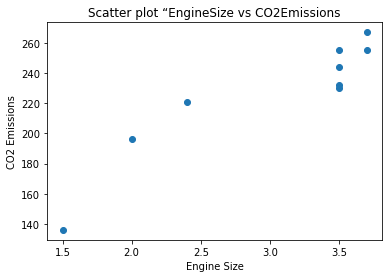

In [4]:
# 1. Scatter plot “EngineSize vs CO2Emissions”
plt.scatter(x = df['EngineSize'], y = df['CO2Emissions'])
plt.title("Scatter plot “EngineSize vs CO2Emissions")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [5]:
X = df.iloc[:,0:1].values
Y = df.iloc[:,-1].values

In [6]:
X

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7]])

In [7]:
Y

array([196, 221, 136, 255, 244, 230, 232, 255, 267], dtype=int64)

In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression()

In [9]:
print(regressor.coef_)
print(regressor.intercept_)

[43.98446834]
92.80266825965754


In [10]:
Y_train_prediction = regressor.predict(X)
Y_train_prediction

array([180.77160494, 198.36539227, 158.77937077, 246.74830745,
       246.74830745, 246.74830745, 246.74830745, 255.54520112,
       255.54520112])

In [11]:
X_train = [[2.4]]

In [12]:
# 2. Predict the value of CO2 emission on the basis of Engine size for enginesize = 2.4. using data given in “CO2Small.csv” file
Y_test_prediction = regressor.predict(X_train)
print(Y_test_prediction)

[198.36539227]


In [13]:
# 3. Calculate R^2
from sklearn.metrics import r2_score
r2_score(Y, Y_train_prediction)

0.8457874165566486

In [14]:
# 4. Calculate the above details on the larger dataset i.e. file “CO2FullData.csv”
df2 = pd.read_csv('CO2FullData.csv')
df2.head()

,Make,Model,Vehicle Class,ENGINESIZE,CYLINDERS,Transmission,Fuel Type,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,Fuel Consumption Comb (mpg),CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Text(0, 0.5, 'CO2 Emissions')

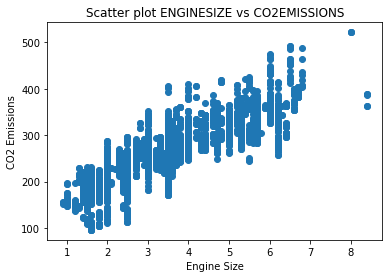

In [15]:
# Scatter plot “EngineSize vs CO2Emissions”
plt.scatter(x = df2['ENGINESIZE'], y = df2['CO2EMISSIONS'])
plt.title("Scatter plot ENGINESIZE vs CO2EMISSIONS")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

In [16]:
X2 = df2.iloc[:,3:4].values
Y2 = df2.iloc[:,-1].values

In [17]:
X2

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [2. ],
       [2. ],
       [2. ]])

In [18]:
Y2

array([196, 221, 136, ..., 240, 232, 248], dtype=int64)

In [19]:
regressor2 = LinearRegression()
regressor2.fit(X2, Y2)

LinearRegression()

In [20]:
print(regressor2.coef_)
print(regressor2.intercept_)

[36.77731519]
134.36589272349642


In [21]:
Y_train_prediction2 = regressor2.predict(X2)
Y_train_prediction2

array([207.9205231 , 222.63144917, 189.5318655 , ..., 207.9205231 ,
       207.9205231 , 207.9205231 ])

In [22]:
# Calculate R^2
r2_score(Y2, Y_train_prediction2)

0.724447204652408

In [23]:
# 5. Print the final equation of the linear
print("Equation of the regression line: ")
print("y = " + str(regressor.coef_[0]) + " * x + " + str(regressor.intercept_))

Equation of the regression line: 
y = 43.98446833930704 * x + 92.80266825965754


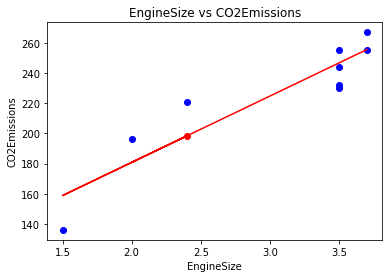

In [24]:
# 6. Plot final line (best fit line) along with other data points
plt.scatter(X, Y, color ='blue')
plt.scatter(2.4, Y_test_prediction, color ='red')
plt.plot(X, Y_train_prediction, color ='red')
plt.xlabel('EngineSize')
plt.ylabel('CO2Emissions')
plt.title('EngineSize vs CO2Emissions')
plt.show()

In [25]:
# 7. Give your comments by comparing the R2 of both the datasets
print("R2 Score of small dataset: " + str(r2_score(Y, Y_train_prediction)))
print("R2 Score of full dataset: " + str(r2_score(Y2, Y_train_prediction2)))

R2 Score of small dataset: 0.8457874165566486
R2 Score of full dataset: 0.724447204652408
